## 모수 추정

 데이터 분석의 첫번째 가정은 
    
#### "분석하고자 하는 데이터가 어떤 확률변수로부터 실현(realized)된 표본이다"라는 가정이다. 


확률론적인 관점에서 볼 때 데이터는 이 확률변수의 분포를 알아내기 위한 일련의 참고 자료일 뿐이다. 따라서 우리는 데이터 즉 표본으로부터 확률변수의 분포를 알아내야 한다.

그런데 확률변수의 분포가 우리가 지금까지 배운 베르누이 분포, 이항 분포, 가우시안 정규 분포 등의 기본 분포 중 하나라면 확률 분포를 알아내는 일은 다음처럼 2개의 작업으로 나뉘어진다.

1. 확률변수가 어떤 확률분포를 따르는지 알아낸다.
2. 확률변수(확률분포)의 모수의 값을 구한다.


확률변수가 어떤 확률분포를 따르는가는 데이터가 생성되는 윈리를 알거나 다음과 같은 데이터의 여러가지 특성을 알면 추측할 수 있다.

+ 데이터는 0 또는 1 뿐이다. (베르누이 확률변수)
+ 데이터는 카테고리 값이어야 한다. (카테고리 확률변수)
+ 데이터는 0과 1사이의 실수 값이어야 한다. (베타 분포 확률변수)
+ 데이터는 항상 0또는 양수이어야 한다. (감마 분포 확률변수 또는 F-분포 확률변수)


정규 분포와 스튜던트-t 분포와 같이 구분하기 힘든 경우도 있는데 이 경우에는 뒤에서 설명할 정규성 검정(normality test)을 사용한다.

##### 두번째 작업 즉, 모수의 값으로 가장 가능성이 높은 하나의 숫자를 찾아내는 작업을 모수 추정(parameter estimation)이라고 한다.

## 모수 추정 방법론

모수 추정 방법에는 다음과 같은 방법들이 있다.

1. 모멘트 방법(method of moment)
2. 최대 가능도 추정(maximum likelihood estimation)
3. 베이지안 추정(Bayesian estimation)


## 모멘트 방법

우선 가장 간단한 방법인 모멘트 방법부터 알아보자.

모멘트 방법(MM: Method of Moment)은 표본자료에 대한 표본 모멘트가 확률 분포의 이론적인 모멘트와 같다고 가정하고 모수를 구하는 방법이다.

$$\mu = \text{E}[X] \triangleq \bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i$$

위 식에서  𝑁 은 데이터의 갯수,  𝑥𝑖 는 표본 데이터이다.

2차 모멘트(분산)의 경우에는 다음과 같다.

$$\sigma^2 = \text{E}[(X-\mu)^2] \triangleq \bar{s}^2 = \dfrac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2$$

## 모멘트 방법을 사용한 베르누이 분포의 모수 추정

모멘트 방법으로 베르누이 확률변수의 모수  𝜇 를 구하면 다음과 같다. 이 식에서  𝑁1 은 1의 갯수이다.

$$\text{E}[X] = \mu \triangleq \bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i  = \dfrac{N_1}{N}$$


## 모멘트 방법을 사용한 정규 분포의 모수 추정

모멘트 방법으로 정규 분포의 모수  𝜇 ,  𝜎2 를 구하면 다음과 같다.

$$\text{E}[X] = \mu \triangleq \bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i$$

$$\text{E}[(X-\mu)^2] = \sigma^2 \triangleq s^2 = \dfrac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2$$

정규분포는 모수가 아예 모멘트로 정의되어 있기 때문에 모멘트 방법을 사용하면 아주 쉽게 모수를 추정할 수 있다.

## 모멘트 방법을 사용한 베타 분포의 모수 추정

모멘트 방법으로 베타 분포의 모수  𝑎 ,  𝑏 를 구하면 다음과 같다. 이 경우에는 모수와 모멘트 간의 관계를 이용하여 비선형 연립 방정식을 풀어야 한다.

$$\text{E}[X] = \dfrac{a}{a+b} \triangleq \bar{x}$$

$$\text{E}[(X-\mu)^2] = \dfrac{ab}{(a+b)^2(a+b+1)} \triangleq s^2$$

이 비선형 연립방정식을 풀어 해를 구하면 다음과 같다.

$$a = \bar{x} \left( \frac{\bar{x} (1 - \bar{x})}{s^2} - 1 \right)$$

$$b = (1 - \bar{x}) \left( \frac{\bar{x} (1 - \bar{x})}{s^2} - 1 \right)$$

예를 들어  𝑎=15,𝑏=12 인 베타 분포의 데이터 100개로부터 모멘트 방법으로 모수를 추정하면 다음과 같다.

In [2]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

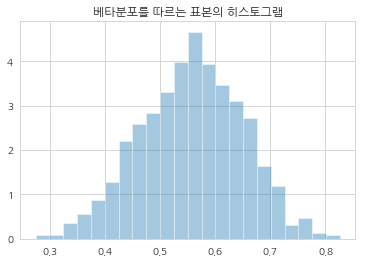

In [3]:
import scipy as sp
import scipy.stats

np.random.seed(0)
x = sp.stats.beta(15, 12).rvs(1000)  # 0-1까지의 실수값 표본 생성

sns.distplot(x, kde=False, norm_hist=True)
plt.title("베타분포를 따르는 표본의 히스토그램")
plt.show()

In [21]:
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * (x_bar * (1 - x_bar) / s2 - 1)
    b = (1 - x_bar) * (x_bar * (1- x_bar) / s2 - 1)
    return a, b

params = estimate_beta(x)
type(params)

tuple

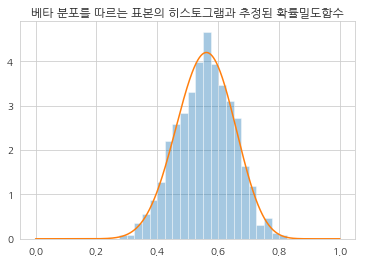

In [22]:
xx = np.linspace(0, 1, 1000)
sns.distplot(x, kde=False, norm_hist=True)
plt.plot(xx, sp.stats.beta(params[0], params[1]).pdf(xx))
plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()